In [1]:
# Import library
import librosa
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import scipy.io.wavfile as wav
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load audio file
file_list=["/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/HF_ANALOG.wav",
           "/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VHF_ANALOG.wav",
           "/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VHF_VOIP.wav",
           "/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VOIP telephone.wav"]


In [3]:
def cut_to_duration(audio_file_path, output_file_path, duration_seconds=10):
    """
    Cuts the audio file to the specified duration (in seconds).
    
    Parameters:
    - audio_file_path (str): Path to the input audio file.
    - output_file_path (str): Path to save the truncated audio file.
    - duration_seconds (float, optional): Desired duration in seconds. Default is 10 seconds.
    
    Returns:
    None
    """
    
    # Load the audio file
    y, sr = librosa.load(audio_file_path, sr=None)
    
    # Calculate the desired length in samples
    desired_length = sr * duration_seconds
    
    # If the audio is longer than the desired length, truncate it
    if len(y) > desired_length:
        y = y[:desired_length]
    
    # Save the truncated or original audio to the output path
    sf.write(output_file_path, y, sr)

for file in file_list:
    cut_to_duration(file,file)

In [4]:
def np_arr(X_train, X_test, y_train, y_test):
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)


    X_train = X_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    return X_train, X_test, y_train, y_test


dB values over time:
Time: 0.06s, SNR: nan dB
Time: 0.13s, SNR: nan dB
Time: 0.19s, SNR: 72.80 dB
Time: 0.26s, SNR: 60.23 dB
Time: 0.32s, SNR: 73.85 dB
Time: 0.38s, SNR: nan dB
Time: 0.45s, SNR: nan dB
Time: 0.51s, SNR: 132.45 dB
Time: 0.58s, SNR: 74.20 dB
Time: 0.64s, SNR: nan dB
Time: 0.70s, SNR: nan dB
Time: 0.77s, SNR: nan dB
Time: 0.83s, SNR: nan dB
Time: 0.90s, SNR: nan dB
Time: 0.96s, SNR: inf dB
Time: 1.02s, SNR: nan dB
Time: 1.09s, SNR: nan dB
Time: 1.15s, SNR: nan dB
Time: 1.22s, SNR: nan dB
Time: 1.28s, SNR: nan dB
Time: 1.34s, SNR: nan dB
Time: 1.41s, SNR: nan dB
Time: 1.47s, SNR: nan dB
Time: 1.54s, SNR: 101.86 dB
Time: 1.60s, SNR: 90.04 dB
Time: 1.66s, SNR: 105.31 dB
Time: 1.73s, SNR: nan dB
Time: 1.79s, SNR: nan dB
Time: 1.86s, SNR: 90.20 dB
Time: 1.92s, SNR: nan dB
Time: 1.98s, SNR: nan dB
Time: 2.05s, SNR: nan dB
Time: 2.11s, SNR: 86.24 dB
Time: 2.18s, SNR: nan dB
Time: 2.24s, SNR: nan dB
Time: 2.30s, SNR: nan dB
Time: 2.37s, SNR: nan dB
Time: 2.43s, SNR: nan dB
Time: 

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Time: 0.06s, SNR: 35.89 dB
Time: 0.13s, SNR: 35.20 dB
Time: 0.19s, SNR: 68.71 dB
Time: 0.26s, SNR: 49.95 dB
Time: 0.32s, SNR: 35.05 dB
Time: 0.38s, SNR: 35.18 dB
Time: 0.45s, SNR: 35.20 dB
Time: 0.51s, SNR: 34.98 dB
Time: 0.58s, SNR: 44.93 dB
Time: 0.64s, SNR: 47.57 dB
Time: 0.70s, SNR: 41.84 dB
Time: 0.77s, SNR: 48.92 dB
Time: 0.83s, SNR: 44.12 dB
Time: 0.90s, SNR: 48.86 dB
Time: 0.96s, SNR: 41.23 dB
Time: 1.02s, SNR: 40.33 dB
Time: 1.09s, SNR: 39.55 dB
Time: 1.15s, SNR: 37.66 dB
Time: 1.22s, SNR: 37.70 dB
Time: 1.28s, SNR: 40.47 dB
Time: 1.34s, SNR: 41.44 dB
Time: 1.41s, SNR: 62.76 dB
Time: 1.47s, SNR: 45.93 dB
Time: 1.54s, SNR: 41.00 dB
Time: 1.60s, SNR: 54.34 dB
Time: 1.66s, SNR: 38.78 dB
Time: 1.73s, SNR: 50.51 dB
Time: 1.79s, SNR: 39.67 dB
Time: 1.86s, SNR: 40.97 dB
Time: 1.92s, SNR: 43.70 dB
Time: 1.98s, SNR: 40.44 dB
Time: 2.05s, SNR: 41.35 dB
Time: 2.11s, SNR: 56.17 dB
Time: 2.18s, SNR: 56.10 dB
Time: 2.24s, SNR: 44.36 dB
Time: 2.30s, SNR: 44.16 dB
Time: 2.37s, SNR: 49.28 dB
T

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


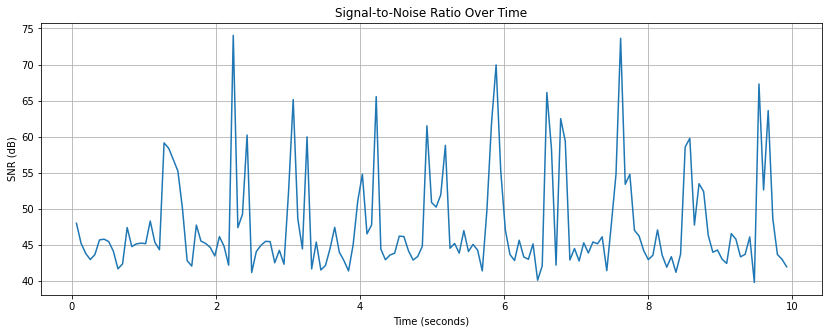

In [40]:
def calculate_snr(signal, noise_floor_percentile=10):
    # Estimate noise as the part of the signal that's close to zero
    noise_floor = np.percentile(np.abs(signal), noise_floor_percentile)
    noise_idx = np.abs(signal) < noise_floor
    
    # Calculate signal and noise power
    signal_power = np.mean(signal**2)
    noise_power = np.mean(signal[noise_idx]**2)
    
    # Handle case of zero noise power
    if noise_power == 0:
        return np.inf # Infinite SNR
    else:
    # Compute SNR
        snr = signal_power / noise_power
        return 10 * np.log10(snr)  # Convert to dB

def calculate_snr_over_time(file_path, frame_length=1024, overlap=512):
    # Read the WAV file
    sample_rate, data = wav.read(file_path)
    
    # Mono-ize if stereo
    if len(data.shape) > 1:
        data = data[:, 0]
        
    # Normalize the signal
    data = data / np.max(np.abs(data))
    
    # Prepare windowing function
    window = np.hanning(frame_length)
    
    # Calculate the number of frames
    step_size = frame_length - overlap
    num_frames = 1 + int((len(data) - frame_length) / step_size)
    
    # Initialize array to hold SNR values
    snr_values = []
    for i in range(num_frames):
        start = i * step_size
        stop = start + frame_length
        frame = data[start:stop] * window
        value = calculate_snr(frame)
        snr_values.append(value)
 
    # Time vector for plotting
    time_vector = (np.arange(num_frames) * step_size + frame_length / 2) / sample_rate
    
    return snr_values, time_vector

# Calculate SNR and dB values over time
X = []
Y = []
noise_files = ['/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/HF_ANALOG.wav', 
               '/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VHF_ANALOG.wav']
clean_files = ['/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VHF_VOIP.wav',
               '/Users/dangminh0912/Desktop/Year 4 (Sem 1)/DA 401/Dataset/VOIP telephone.wav']

# Print the dB values
print("dB values over time:")
for file in noise_files:
    snr_values, time_vector = calculate_snr_over_time(file)
    for time,snr in zip(time_vector, snr_values):
        if np.logical_not(np.isnan(snr)) and np.logical_not(np.isinf(snr)):
            X.append(snr)
            Y.append(1)
        print(f"Time: {time:.2f}s, SNR: {snr:.2f} dB")
            
for file in clean_files:
    snr_values, time_vector = calculate_snr_over_time(file)
    for time,snr in zip(time_vector, snr_values):
        if np.logical_not(np.isnan(snr)) and np.logical_not(np.isinf(snr)):
            X.append(snr)
            Y.append(0)
        print(f"Time: {time:.2f}s, SNR: {snr:.2f} dB")

print(X)
print(Y)
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = np_arr(X_train, X_test, y_train, y_test)

model.fit(X_train, y_train)
print("Frequency Score: ", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot SNR over time
plt.figure(figsize=(14, 5))
plt.plot(time_vector, snr_values)
plt.title("Signal-to-Noise Ratio Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("SNR (dB)")
plt.grid(True)
plt.show()


Source: 
https://en.wikipedia.org/wiki/Signal-to-noise_ratio

https://emastered.com/blog/signal-to-noise-ratio

https://play.fallows.ca/wp/radio/ham-radio/signal-noise-ratio-essence-radio/

https://resources.pcb.cadence.com/blog/2020-what-is-signal-to-noise-ratio-and-how-to-calculate-it